In this notebook, i'm using AutoEncoders for denoising images from `fashion_mnist dataset`

The idea is simple: train an autoencoder on noiseless images. Once the autoencoder is trained, input a noisy image, it should output the denoised image.

As a reminder, the labels in fasion-mnist are the following:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Rescaling, Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [1]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

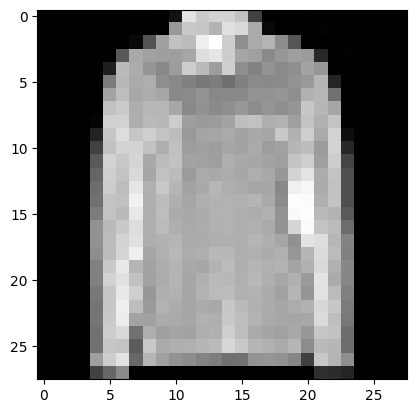

In [3]:
# Some exploration
idx = np.random.randint(1,1000)
plt.imshow(X_train[idx], cmap='gray')
plt.show()

In [5]:
# Normalize the data
X_train_scaled = X_train/255.
X_test_scaled = X_test/255.


# Reshape the data
X_train_flattened = X_train_scaled.reshape(X_train.shape[0], -1)
X_test_flattened = X_test_scaled.reshape(X_test.shape[0], -1)

y_train = to_categorical(y_train)

X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

In [6]:
# Build an autoencoder
def autoencoder(latent_dim):
    # define the input layer: the pixel values
    input_img = Input(shape=(X_train_flattened.shape[1],))

    # Rescaling(1./255)
    # flattenFlatten()
    # encode
    encoded = Dense(latent_dim, activation='relu')(input_img)

    # Reshape((pixels))
    # decode
    decoded = Dense(X_train_flattened.shape[1], activation='sigmoid')(encoded)

    # output = Reshape(X_train.shape[1:])
    # Define the autoencoder model
    autoencoder = Model(input_img, decoded) # ouput to give inplace of decoded

    return autoencoder

In [7]:
aut_encoder = autoencoder(32)

In [8]:
aut_encoder.compile(optimizer='adam', loss='mse')
aut_encoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
784*32 + 32

25120

In [10]:
aut_encoder.fit(X_train_flattened, X_train_flattened,
                epochs=10,
                batch_size=256,
                validation_split=.2)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1008 - val_loss: 0.0379
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0335 - val_loss: 0.0261
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0248 - val_loss: 0.0221
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0210 - val_loss: 0.0193
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188 - val_loss: 0.0175
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 - val_loss: 0.0163
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0159 - val_loss: 0.0154
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - val_loss: 0.0148
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0146 - val_loss: 0.0145
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0142 - val_loss: 0.0141


Check out how your model worked: display some pairs of input and output images.

In [11]:
X_pred = aut_encoder.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


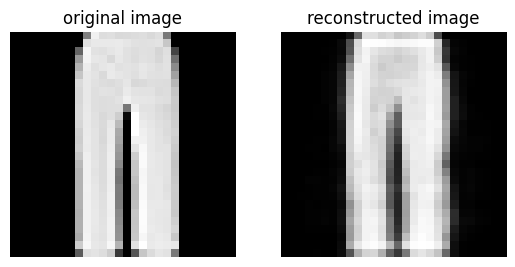

In [12]:
### Display some reconstructed images
idx = np.random.randint(X_test.shape[0])

plt.subplot(121)
plt.imshow(X_test[idx].reshape(28,28), cmap = 'gray')
plt.title('original image')
plt.axis('off')
plt.subplot(122)
plt.imshow(X_pred[idx].reshape(28, 28), cmap = plt.cm.gray)
plt.title('reconstructed image')
plt.axis('off')
plt.show()

Below a function to add noise.

In [13]:
def add_noise(X_train, noise_factor=0.35):

    X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0*X_train.max(), size=X_train.shape) 
    X_train_noisy = np.clip(X_train_noisy, 0., 1.)

    return X_train_noisy

Image for index 99


<function matplotlib.pyplot.show(close=None, block=None)>

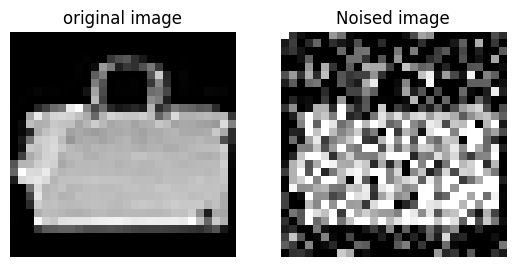

In [14]:
# Create a noisy dataset
X_train_noisy = add_noise(X_train_scaled, noise_factor=0.35)

idx = np.random.randint(1,100)

print("Image for index", idx)
plt.subplot(121)
plt.imshow(X_train_scaled[idx], cmap='gray')
plt.title('original image')
plt.axis('off')
plt.subplot(122)
plt.imshow(X_train_noisy[idx], cmap='gray')
plt.title('Noised image')
plt.axis('off')
plt.show

In [15]:
X_train_noisy.shape

(60000, 28, 28)

In [16]:
X_test_noisy = add_noise(X_test_scaled)
X_test_noisy = X_test_noisy.reshape(X_test_noisy.shape[0], -1)
X_test_noisy.shape

(10000, 784)

In [18]:
X_train_flattened.shape

(60000, 784)

In [20]:
X_train_noisy = X_train_noisy.reshape(X_train_noisy.shape[0], -1)

In [21]:
aut_encoder.fit(X_train_noisy, X_train_flattened,
                epochs=20,
                batch_size=256,
                validation_split=.2)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0191 - val_loss: 0.0186
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0181 - val_loss: 0.0179
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0177 - val_loss: 0.0177
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0175 - val_loss: 0.0177
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0174 - val_loss: 0.0175
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0173 - val_loss: 0.0174
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0172 - val_loss: 0.0173
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0171 - val_loss: 0.0173
Epoch 9/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0171 - val_loss: 0.0172
Epoch 10/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0169 - val_loss: 0.0172
Epoch 11/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 - val_loss: 0.0171
Epoch 12/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [41]:
X_pred_encoded_img = aut_encoder.predict(X_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


In [42]:
X_pred_encoded_img.shape

(10000, 784)

In [43]:
X_pred_decoded = aut_encoder.predict(X_pred_encoded_img)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


In [44]:
X_pred_decoded.shape

(10000, 784)

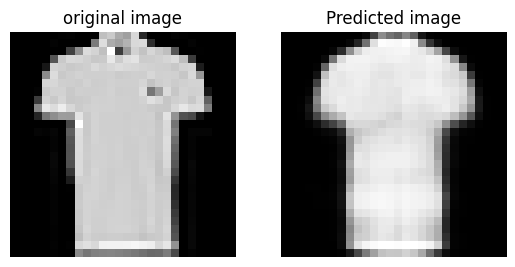

In [54]:
idx = np.random.randint(1,100)

plt.subplot(121)
plt.imshow(X_test_scaled[idx].reshape(28,28), cmap = 'gray')
plt.title('original image')
plt.axis('off')
plt.subplot(122)
plt.imshow(X_pred_decoded[idx].reshape(28, 28), cmap = plt.cm.gray)
plt.title('Predicted image')
plt.axis('off')
plt.show()

## Getting better results using CNN

You can get better results using CNN autoencoder instead of regular autoencoder.

In [32]:
x_train = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 28, 28, 1)) 
x_test = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [33]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

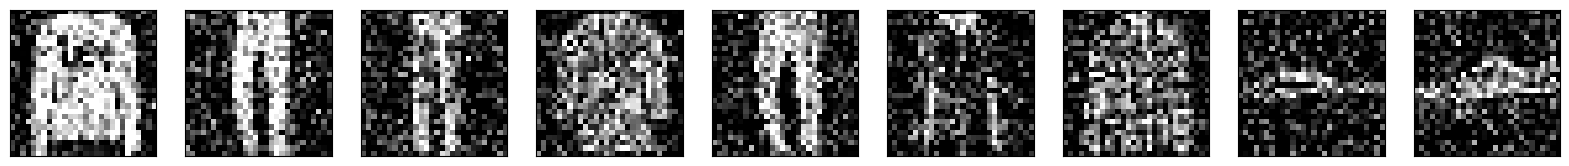

In [34]:
n = 9
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [35]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# (7, 7, 32) --> decode
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# this model maps an input to its reconstruction
cnn_autoencoder = Model(input_img, decoded)
cnn_autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [38]:
callbacks = [EarlyStopping(monitor="val_loss", patience=3)]

In [40]:
cnn_autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=callbacks)

In [19]:
encoded_imgs = cnn_autoencoder.predict(x_test)
decoded_imgs = cnn_autoencoder.predict(encoded_imgs)
encoded_imgs[0].shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


(28, 28, 1)

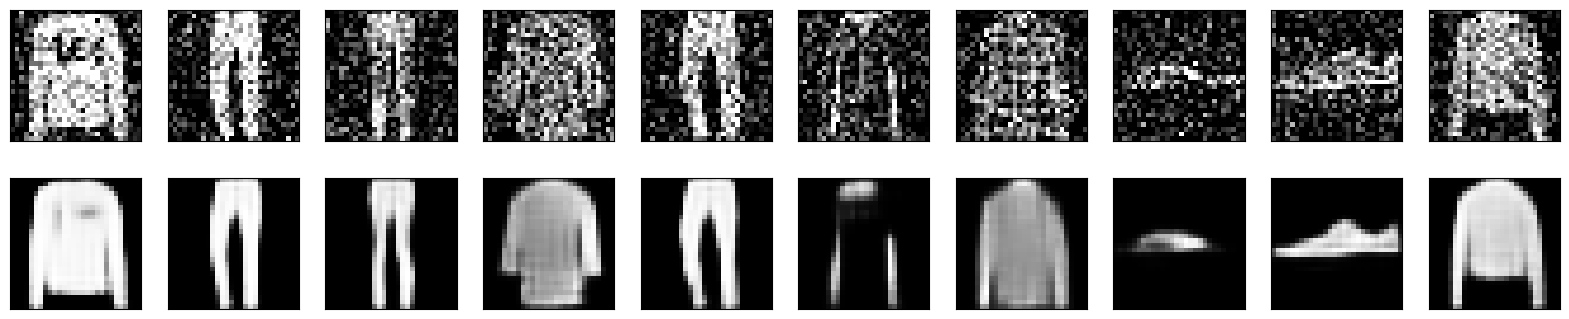

In [20]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
 # display original
    ax = plt.subplot(2, n, i )
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Isn't this great :)